DATA SCIENCE LIFECYCLE EXAMS
THEME 4: EDUCATION: ARTIFICIAL INTELLIGENCE (AI) IN HIGHER EDUCATION 
NAME: EFPREM OKELLO
ACCESS NUMBER: B31324

STEP 1: IMPORT NECESSARY LIBRARIES

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


STEP 2: READ IN THE DATA SETS

In [30]:
# Fetch the dataset
from ucimlrepo import fetch_ucirepo
student_performance = fetch_ucirepo(id=320)

# Data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

# Combine features and target for easier manipulation
df = pd.concat([X, y], axis=1)


STEP 3: DATA PREPROCESSING

In [31]:
# Convert categorical variables to numeric using Label Encoding
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define target variable (Final grade)
# Convert G3 to a binary classification problem: Pass (1) if Final_Grade >= 10, Fail (0) otherwise
df['G3'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)



STEP 4: EXPLORATORY DATA ANALYSIS

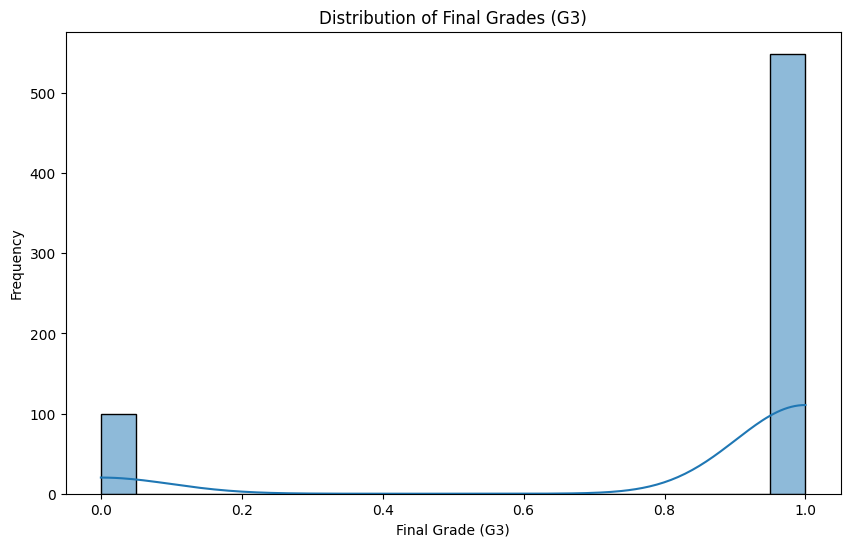

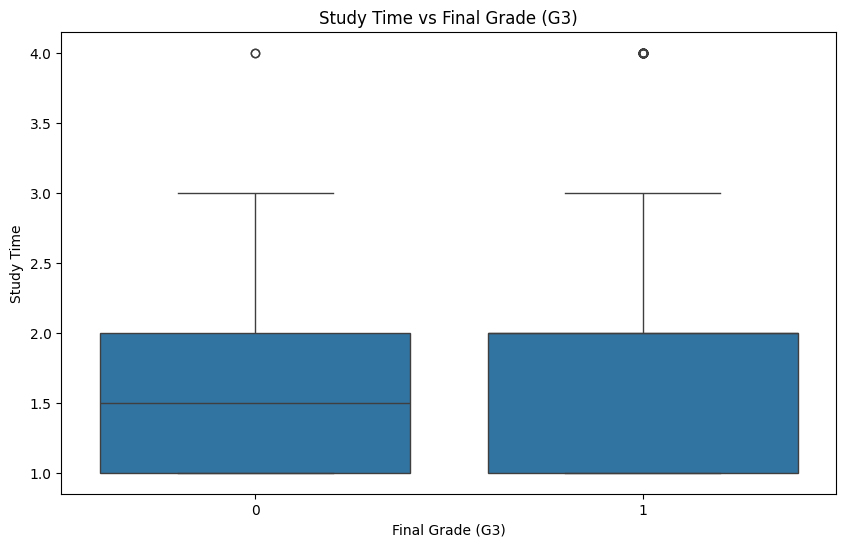

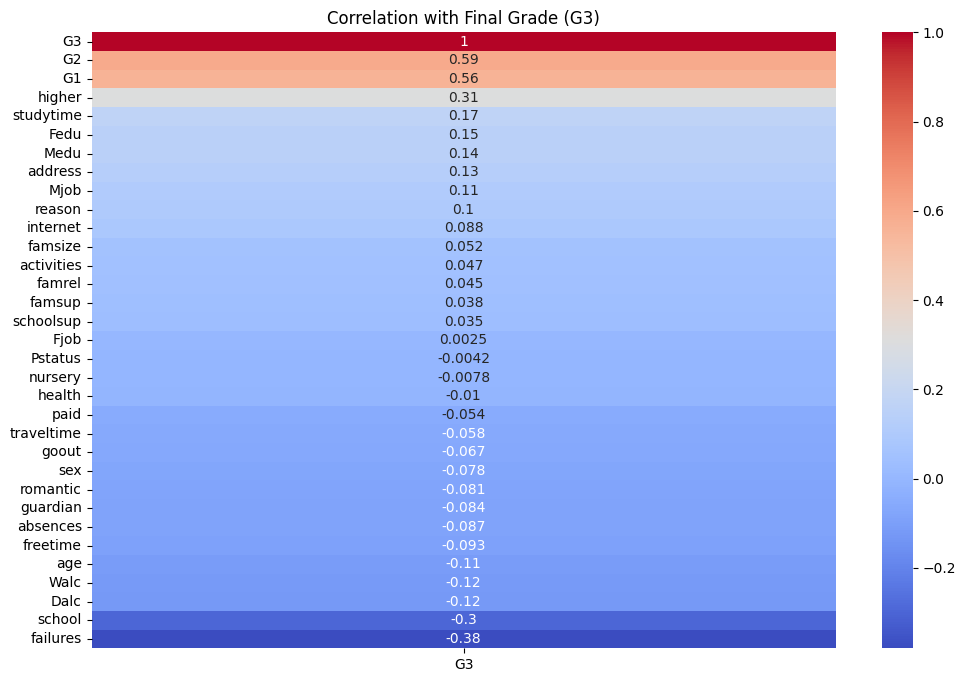

In [32]:
# a. Analyze historical student performance
plt.figure(figsize=(10, 6))
sns.histplot(df['G3'], kde=True, bins=20)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

# b. Highlight high-performing and low-performing students
plt.figure(figsize=(10, 6))
sns.boxplot(x='G3', y='studytime', data=df)
plt.title('Study Time vs Final Grade (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Study Time')
plt.show()

# c. Identify variables that affect student performance
# Exclude non-numeric columns when calculating the correlation matrix
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['G3']].sort_values(by='G3', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Final Grade (G3)')
plt.show()




STEP 5: BUILD AND EVALUATE MODELS

In [ ]:
# Select the variables that correlate with G3
selected_features = ['G1', # first period grade (numeric: from 0 to 20)
                     'G2', # second period grade (numeric: from 0 to 20)
                     'G3', # final grade (numeric: from 0 to 20, output target)
                     'age', # student's age (numeric: from 15 to 22)
                     'studytime', # weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
                     'failures', #number of past class failures (numeric: n if 1<=n<3, else 4)
                     'higher', # wants to take higher education (binary: yes or no)
                     'Dalc', # workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
                     'Walc', # weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
                     ]  

df = df[selected_features]

In [45]:
# Split into features (X) and target (y)
X = df.drop(columns=['G1', 'G2', 'G3'])  # Drop intermediate grades to avoid data leakage
y = df['G3']

# Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Numerical Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:

# Model 1: Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Model 2: Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Model 3: Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))


Logistic Regression Results:
Accuracy: 0.8923076923076924
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.33      0.42        15
           1       0.92      0.97      0.94       115

    accuracy                           0.89       130
   macro avg       0.74      0.65      0.68       130
weighted avg       0.88      0.89      0.88       130

Random Forest Results:
Accuracy: 0.8461538461538461
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.27      0.29        15
           1       0.91      0.92      0.91       115

    accuracy                           0.85       130
   macro avg       0.61      0.59      0.60       130
weighted avg       0.84      0.85      0.84       130

Gradient Boosting Results:
Accuracy: 0.8538461538461538
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.40      0.39        15

In [47]:
# Compare model performance
model_results = {
    'Logistic Regression Results': accuracy_score(y_test, y_pred_lr),
    'Random Forest Results': accuracy_score(y_test, y_pred_rf),
    'Gradient Boosting Results': accuracy_score(y_test, y_pred_gb)
}

best_model = max(model_results, key=model_results.get)
print(f"\nRecommended Model: {best_model} with Accuracy: {model_results[best_model]}")


Recommended Model: Logistic Regression Results with Accuracy: 0.8923076923076924


STEP 5: VALIDATE MODEL

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Sample data for one person
sample_data = {
    'age': [31],  # Student's age
    'studytime': [3],  # Weekly study time (1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, 4 - >10 hours)
    'failures': [0],  # Number of past class failures
    'higher': ['yes'],  # Wants to take higher education (yes or no)
    'Dalc': [1],  # Workday alcohol consumption (1 - very low to 5 - very high)
    'Walc': [2],  # Weekend alcohol consumption (1 - very low to 5 - very high)
}

# Convert sample data to DataFrame
sample_df = pd.DataFrame(sample_data)

# Convert 'higher' column to binary (yes -> 1, no -> 0)
sample_df['higher'] = sample_df['higher'].map({'yes': 1, 'no': 0})

# Standardize the sample data using the same scaler used for training
sample_X = scaler.transform(sample_df)

# Predict using the trained Logistic Regression model
predicted_grade = lr.predict(sample_X)

# Display the prediction
print(f"Predicted Final Grade (G3) for the student: {predicted_grade[0]}")

Predicted Final Grade (G3) for the student: 1
